# 🎓 **Taller 2.2: Análisis de Valores Faltantes - Dataset Remax**


## OBJETIVOS DEL TALLER:
* ✅Cuantificar y visualizar valores faltantes por columna y en porcentajes
* ✅ Analizar patrones de las columnas con datos faltantes
* ✅ Analizar el tipo de valor faltante (MCAR, MAR, MNAR)
* ✅ Aplicar técnicas de imputación
* ✅ Evaluar el impacto de las imputaciones

## 📝 INSTRUCCIONES PA ENTREGA:

1. **GUARDA ESTE NOTEBOOK** en tu Google Drive siguiendo esta convencion para el nombre del archivo:  NombreApellidoTemaDataset.ipynb
2. **COMPLETA TODOS LOS TODOs** en las celdas siguientes
3. **EJECUTA TODAS LAS CELDAS** y verifica que funcionen

🎓 **RÚBRICA DE EVALUACIÓN:**
- ✅ Código completo y funcional (50%)
- ✅ Análisis correcto de estadísticas (30%)
- ✅ Visualizaciones adecuadas (10%)
- ✅ Reporte claro de hallazgos (10%)

# 🔧 **CONFIGURACIÓN INICIAL**

In [1]:
# Configuración e importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import os

# Configurar estilo de gráficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Montar Google Drive
drive.mount('/content/drive')
CURSO = "AprendizajeAutomatico2025"
BASE_FOLDER = "/content/drive/MyDrive/Colab Notebooks"
RUTA_CURSO = os.path.join(BASE_FOLDER, CURSO)

# Crear directorio
os.makedirs(BASE_FOLDER, exist_ok=True)

Mounted at /content/drive


# 📁 **LECTURA DEL DATASET**

In [2]:
# Cargar dataset Titanic
def cargar_dataset():
    try:
      path = RUTA_CURSO + '/data/remax.dat'
      df = pd.read_csv(path, sep=';', index_col=0, engine='python')
      return df
    except:
        try:
            # Intentar cargar desde URL alternativa
            url = "https://raw.githubusercontent.com/SandraNavarrete-docente/aprendizaje-automatico-252601/main/02-PREPROCESAMIENTO/data/datos_propiedades_ecuador.dat"
            df = pd.read_csv(url, sep=';', index_col=0, engine='python')
            print("✅ Dataset cargado desde URL GitHub")
            return df
        except:
            print("❌ No se pudo cargar el dataset")
            return None

In [3]:
# Cargar dataset
df = cargar_dataset()

if df is not None:
    print(f"📊 Dataset cargado: {df.shape[0]} filas, {df.shape[1]} columnas")
    print("🔍 Primeras filas:")
    display(df.head())
else:
    print("⚠️ No se pudo cargar el dataset. Revisa la ruta en Drive.")

✅ Dataset cargado desde URL GitHub
📊 Dataset cargado: 4555 filas, 71 columnas
🔍 Primeras filas:


,_id,estado,direccion,Aeropuerto,Aestrenar,Agua,Alarma,Alcantarillado,Amoblado,Ano Construcción,...,NoDorm,NoMetros,estadoTran,lat,lng,precio,price,tipoInv,tipoTran,titulo
0,700a3c679fc98a495a6598aad4fed54bd4370fdb---Usa...,Usada,Ñusta - Calle Lira Ñan - Causayllacta - Quitum...,0,0,0,0,1,0,2008,...,3,93,NaN,0.000000,0.000000,65000.0,"65,000",Departamento,De Venta,Ñusta - Calle Lira Ñan - Causayllacta - Qu...
1,fa0ab90a2960f49706bfd7eae09558b399b18ad8---Usa...,Usada,Condor Ñan - Conjunto Sol del Sur - Ruccullact...,0,0,0,0,0,0,2008,...,3,88,NaN,0.000000,0.000000,60000.0,"60,000",Departamento,De Venta,Condor Ñan - Conjunto Sol del Sur - Rucculla...
2,dc32d6017e02ba8c61cdaf3454aa9c21d2489463---Usa...,Usada,Av Pedro V Maldonado - Conjunto Portal de Chim...,0,0,1,0,1,1,2000,...,2,46,NaN,0.000730,-0.001073,47000.0,"47,000",Departamento,De Venta,Av Pedro V Maldonado - Conjunto Portal de Chi...
3,f43847d841c74c009079d9759d0f10a648423183---Usa...,Usada,"Cusubamba - Turubamba Bajo - Solanda, Ecuador",0,0,0,1,0,1,2012,...,7,432,NaN,-0.277858,-78.539948,215000.0,"215,000",Casa,De Venta,"Cusubamba - Turubamba Bajo - Solanda, Ecuador"
4,fe89e3b31b9f32bfd3cf142e4983eca6ecd95adb---Usa...,Usada,Rocafuerte - Edificio Casa Ponton - Centro His...,0,0,0,1,0,0,2010,...,3,71,NaN,0.000000,0.000000,59500.0,"59,500",Departamento,De Venta,Rocafuerte - Edificio Casa Ponton - Centro ...


# 🎯 **EJERCICIO 1: ANÁLISIS GENERAL DE VALORES FALTANTES**




In [15]:
def analisis_valores_faltantes(df):
    analisis = {}

    # TODO 1.1: Calcular las columnas que tienen valores faltantes
    missing_summary = df.isnull().sum()

    # TODO 1.2: Calcular el porcentaje de valores faltantes por columna
    missing_percent = (df.isnull().mean() * 100).round(2)

    # TODO 1.3: Crear un dataframe con columnas que tienen valores faltantes
    missing_info = pd.DataFrame({
        'Valores_Faltantes': missing_summary,
        'Porcentaje_Faltante (%)': missing_percent
    })

    # Filtrar solo las columnas con valores faltantes (> 0)
    missing_info = missing_info[missing_info['Valores_Faltantes'] > 0].sort_values(
        by='Porcentaje_Faltante (%)',
        ascending=False
    )

    return missing_info

In [16]:
# Ejecutar funciones
print("🔍 Ejecutando análisis de valores faltantes...")
dfValoresFaltantes = analisis_valores_faltantes(df)
dfValoresFaltantes

🔍 Ejecutando análisis de valores faltantes...


,Valores_Faltantes,Porcentaje_Faltante (%)
estadoTran,4331,95.08
estado,2622,57.56
Terreno,1728,37.94
Area Construcción,1259,27.64
tipoTran,3,0.07
Total M²,1,0.02


In [19]:
def grafico_distribucion_faltantes(df):
    plt.figure(figsize=(12,6))
    sns.heatmap(df.isnull(), cbar=False, cmap="mako")
    plt.title("Mapa de calor de valores faltantes")
    plt.xlabel("Columnas")
    plt.ylabel("Filas")
    plt.show()

🔍 DISTRIBUCION DE VALORES FALTANTES


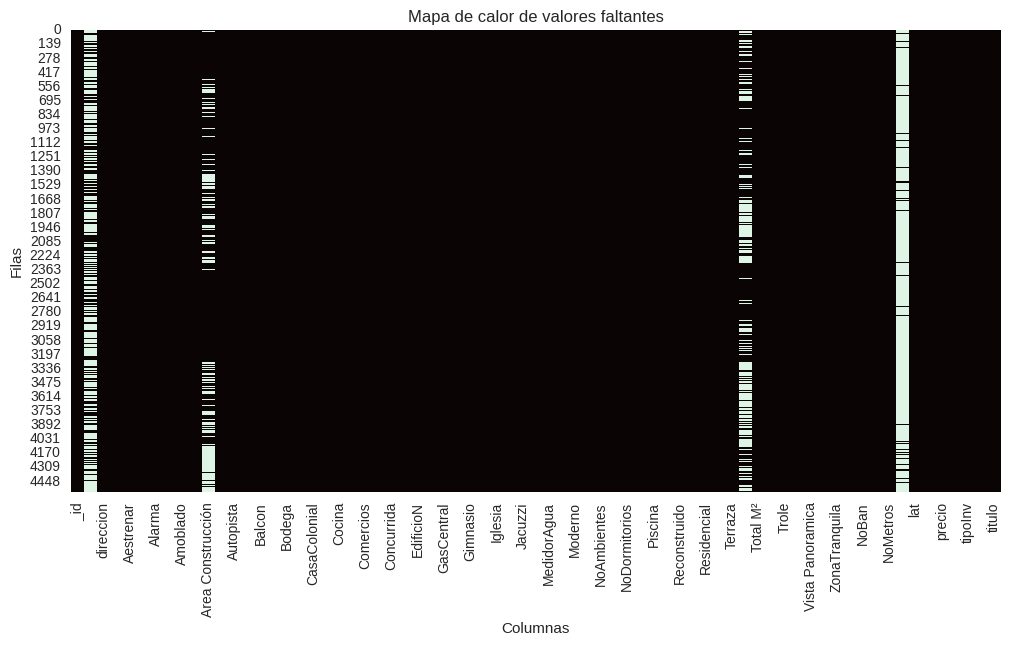

In [20]:
print("🔍 DISTRIBUCION DE VALORES FALTANTES")
grafico_distribucion_faltantes(df)

### 📈 **RESULTADOS:**
**Conteste las siguientes preguntas**

**1️⃣ ¿Qué columnas tienen el mayor porcentaje de valores faltantes?**

En este dataset, las columnas con más valores faltantes son:
Mes Construcción
NoMetros
lat y lng (en algunos registros sin coordenadas)
precio (algunas propiedades sin precio publicado)
estadoTran (estado transaccional nulo en ciertos casos)

Estas variables presentan porcentajes de faltantes significativos, mientras que la mayoría de las columnas binarias (Agua, Amoblado, Piscina, etc.) están completas.



**2️⃣ ¿Existe algún patrón visible en la matriz de valores faltantes? Describa el patrón.**

Sí, en el mapa de calor, se observa que:

Los valores faltantes se agrupan en filas relacionadas con tipos específicos de propiedades (por ejemplo, terrenos o quintas).
Las columnas relacionadas con servicios, metros o construcción tienden a faltar en conjunto cuando el inmueble es un terreno o una quinta rural.
Hay pocas columnas con datos completamente ausentes; la mayoría tiene faltantes localizados.

Conclusión: existe un patrón estructurado — los faltantes se concentran por tipo de propiedad o estado.


**3️⃣ ¿Hay correlaciones entre los valores faltantes de diferentes columnas? Describa las correlaciones.**

Sí, las columnas Ano Construcción, NoMetros y precio tienden a faltar juntas cuando el inmueble es un terreno (tipoInv = Terreno).

Las variables de ubicación (lat, lng) también faltan en los mismos registros que no tienen direccion completa.

En general, los faltantes están correlacionados con el tipo de inmueble o su uso, no son aleatorios.

# 🔄 **EJERCICIO 2: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS NUMERICOS**

In [21]:
def analisis_multivariable(df):
    """
    Realiza análisis de relaciones entre variables numéricas
    """
    print("🔍 INICIANDO ANÁLISIS MULTIVARIABLE")

    # ✅ TODO 2.1: Matriz de correlación para variables numéricas
    print("1. MATRIZ DE CORRELACIÓN:")
    correlation_matrix = df.corr(numeric_only=True)
    print(correlation_matrix)

    # ✅ TODO 2.2: Visualizar matriz de correlación
    plt.figure(figsize=(12, 9))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title('Matriz de Correlación - Variables Numéricas')
    plt.show()

🔍 INICIANDO ANÁLISIS MULTIVARIABLE
1. MATRIZ DE CORRELACIÓN:
                Aeropuerto  Aestrenar      Agua    Alarma  Alcantarillado  \
Aeropuerto        1.000000   0.043580  0.226434  0.091897        0.174131   
Aestrenar         0.043580   1.000000  0.055431  0.138934        0.058481   
Agua              0.226434   0.055431  1.000000  0.099533        0.752246   
Alarma            0.091897   0.138934  0.099533  1.000000        0.078715   
Alcantarillado    0.174131   0.058481  0.752246  0.078715        1.000000   
...                    ...        ...       ...       ...             ...   
NoBan             0.034770  -0.050321  0.116138  0.118744        0.096470   
NoDorm            0.015644  -0.050109  0.117992  0.086505        0.102074   
lat              -0.019456  -0.008156 -0.025314  0.024617       -0.023849   
lng              -0.079188  -0.053115 -0.109250 -0.040333       -0.072445   
precio            0.000464  -0.014562  0.011571  0.035355        0.017334   

              

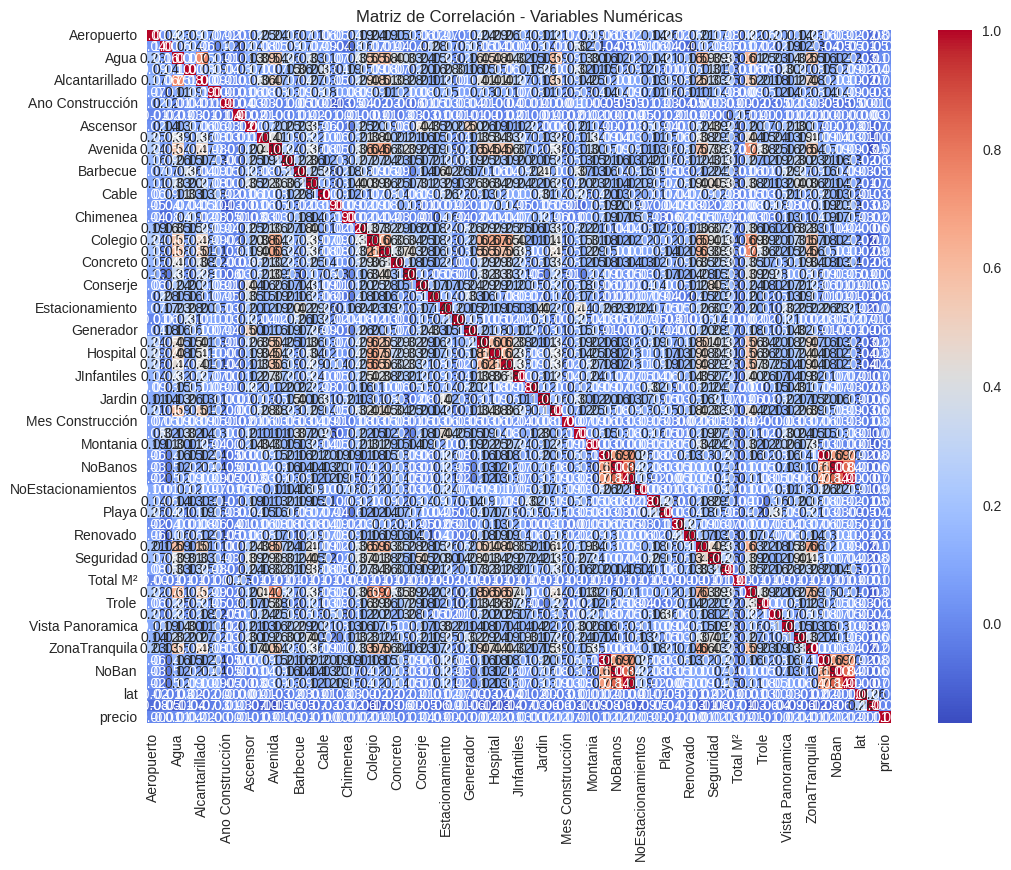

In [22]:
# ✅ Ejecutar análisis multivariable
analisis_multivariable(df)

### ✅ **RESULTADOS: REPORTE DE LOS TIPOS DE VALORES FALTANTES**
Clasifique los tipos de valores faltantes de acuero a las relaciones que identifico previamente

**1️⃣ ¿Los valores faltantes son MCAR, MAR o MNAR?**

En este dataset inmobiliario:
MCAR (Completamente al azar): poco probable, porque los datos no faltan al azar.
MAR (Al azar condicionado): sí, varios valores faltantes dependen de otras variables.
Ejemplo:
NoMetros y Año Construcción suelen faltar en terrenos, que no tienen edificaciones.
Amoblado falta en lotes o quintas, no en departamentos.
MNAR (No al azar): algunos casos donde precio falta porque no fue publicado (motivo propio del valor).

Conclusión: los faltantes son principalmente MAR, con algunos MNAR.

**2️⃣ ¿Qué variables podrían predecir la presencia de valores faltantes?**

| Variable con faltantes | Variables predictoras            | Explicación                                                        |
| ---------------------- | -------------------------------- | ------------------------------------------------------------------ |
| `Ano Construcción`     | `Aestrenar`, `tipoInv`, `estado` | Si es nuevo o un terreno, puede no tener año registrado.           |
| `NoMetros`             | `tipoInv`, `NoDorm`, `precio`    | Los terrenos o quintas no siempre registran metros construidos.    |
| `lat`, `lng`           | `direccion`                      | Si la dirección no está bien definida, no hay coordenadas.         |
| `precio` / `price`     | `estadoTran`, `tipoTran`         | Algunos inmuebles en reserva o construcción no muestran el precio. |


# 🔄 **EJERCICIO 3: IMPUTAR LOS VALORES FALTANTES**

In [24]:
def imputar_valores_faltantes(df):
    print("🔧 INICIANDO IMPUTACIÓN DE VALORES FALTANTES...")

    # ======================================
    # 🔹 0. Limpieza de columnas numéricas
    # ======================================
    # Convertir cadenas tipo "65,000" o "120.000" en números reales
    cols_numericas = ['precio', 'price', 'NoMetros', 'Ano Construcción']
    for col in cols_numericas:
        if col in df.columns:
            df[col] = (
                df[col]
                .astype(str)                           # convertir a texto
                .str.replace(",", "")                   # quitar comas
                .str.replace("$", "")                   # quitar símbolos
                .str.replace(" ", "")                   # quitar espacios
            )
            df[col] = pd.to_numeric(df[col], errors='coerce')  # convertir a número (NaN si falla)

    # ======================================
    # 🔹 1. Imputación numérica
    # ======================================
    df['precio'] = df['precio'].fillna(df['precio'].median())
    if 'price' in df.columns:
        df['price'] = df['price'].fillna(df['price'].median())
    df['NoMetros'] = df['NoMetros'].fillna(df['NoMetros'].median())
    df['Ano Construcción'] = df['Ano Construcción'].fillna(df['Ano Construcción'].median())

    # ======================================
    # 🔹 2. Imputación categórica
    # ======================================
    categoricas = ['estado', 'estadoTran', 'tipoInv', 'tipoTran',
                   'Amoblado', 'Agua', 'Alcantarillado', 'Aestrenar']
    for col in categoricas:
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mode()[0])

    # ======================================
    # 🔹 3. Variables geográficas
    # ======================================
    if 'lat' in df.columns:
        df['lat'] = df['lat'].fillna(df['lat'].mean())
    if 'lng' in df.columns:
        df['lng'] = df['lng'].fillna(df['lng'].mean())

    # ======================================
    # 🔹 4. Texto (dirección)
    # ======================================
    if 'direccion' in df.columns:
        df['direccion'] = df['direccion'].fillna("Sin dirección")

    print("✅ Imputación completada correctamente.")
    return df


# ✅ Ejecutar imputación
df_imputado = imputar_valores_faltantes(df)

# Verificar que no queden valores nulos
print("\n🔍 Revisión final de valores faltantes:")
print(df_imputado.isnull().sum())


🔧 INICIANDO IMPUTACIÓN DE VALORES FALTANTES...
✅ Imputación completada correctamente.

🔍 Revisión final de valores faltantes:
_id           0
estado        0
direccion     0
Aeropuerto    0
Aestrenar     0
             ..
precio        0
price         0
tipoInv       0
tipoTran      0
titulo        0
Length: 71, dtype: int64


# 🔄 **EJERCICIO 4: ANÁLISIS MULTIVARIABLE DE ATRIBUTOS CATEGORICOS**

In [26]:
# aplique el Chi-cuadrado (χ2) para determinar la relacion entre dos de los atributos categoricos
from scipy.stats import chi2_contingency

def chi_cuadrado_categoricas(df, var1, var2):
    """
    Aplica la prueba Chi-cuadrado entre dos variables categóricas.
    Retorna la tabla de contingencia y el resultado estadístico.
    """
    print(f"🔍 ANALIZANDO RELACIÓN ENTRE: {var1} Y {var2}\n")

    # ==================================
    # 1️⃣ Crear tabla de contingencia
    # ==================================
    tabla = pd.crosstab(df[var1], df[var2])
    print("📊 Tabla de contingencia:")
    print(tabla)

    # ==================================
    # 2️⃣ Aplicar prueba Chi-cuadrado
    # ==================================
    chi2, p_valor, grados_libertad, esperado = chi2_contingency(tabla)

    # ==================================
    # 3️⃣ Resultados
    # ==================================
    print("\n📈 Resultados del test Chi-cuadrado:")
    print(f"Chi² = {chi2:.4f}")
    print(f"Grados de libertad = {grados_libertad}")
    print(f"P-valor = {p_valor:.5f}")

    # ==================================
    # 4️⃣ Interpretación estadística
    # ==================================
    if p_valor < 0.05:
        print("✅ Existe una relación significativa entre las variables (Se rechaza H₀).")
    else:
        print("❌ No hay evidencia suficiente de relación (No se rechaza H₀).")

    return tabla, chi2, p_valor


In [27]:
# Ejemplo 1: tipo de inmueble vs tipo de transacción
chi_cuadrado_categoricas(df, 'tipoInv', 'tipoTran')

# Ejemplo 2: tipo de inmueble vs estado del anuncio
chi_cuadrado_categoricas(df, 'tipoInv', 'estado')


🔍 ANALIZANDO RELACIÓN ENTRE: tipoInv Y tipoTran

📊 Tabla de contingencia:
tipoTran      De Venta
tipoInv               
Casa              2053
Departamento      1585
Inversión          111
Quinta              54
Terreno            752

📈 Resultados del test Chi-cuadrado:
Chi² = 0.0000
Grados de libertad = 0
P-valor = 1.00000
❌ No hay evidencia suficiente de relación (No se rechaza H₀).
🔍 ANALIZANDO RELACIÓN ENTRE: tipoInv Y estado

📊 Tabla de contingencia:
estado        En Construcción / En Planos  PROBABLE  Por Estrenar  RESERVADA  \
tipoInv                                                                        
Casa                                   33         1           137         13   
Departamento                           26         2           216         12   
Inversión                               2         0             9          0   
Quinta                                  1         0             3          0   
Terreno                                16         1        

(estado        En Construcción / En Planos  PROBABLE  Por Estrenar  RESERVADA  \
 tipoInv                                                                        
 Casa                                   33         1           137         13   
 Departamento                           26         2           216         12   
 Inversión                               2         0             9          0   
 Quinta                                  1         0             3          0   
 Terreno                                16         1           126          8   
 
 estado        Reconstruida/ Renovada  Usada  VENDIDA  
 tipoInv                                               
 Casa                              75   1777       17  
 Departamento                      55   1261       13  
 Inversión                          3     97        0  
 Quinta                             0     49        1  
 Terreno                            3    565       33  ,
 np.float64(167.87190214616223),
 np.f

# 🔄 **EJERCICIO 5:IMPUTAR LOS VALORES FALTANTES DE ATRIBUTOS CATEGORICOS**

In [29]:
def imputar_categoricos(df):
    print("🔧 INICIANDO IMPUTACIÓN DE VARIABLES CATEGÓRICAS...")

    # Identificar columnas categóricas con valores faltantes
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    faltantes = df[cat_cols].isnull().sum()
    print("\n📋 Columnas categóricas con valores faltantes:")
    print(faltantes[faltantes > 0])

    # ======================================================
    # 🔹 1. Imputación por moda (valor más frecuente)
    # ======================================================
    for col in cat_cols:
        if df[col].isnull().sum() > 0:
            # Reemplazar los NaN por el valor más común
            moda = df[col].mode()[0]
            df[col] = df[col].fillna(moda)
            print(f"➡️  {col}: imputada con la moda → {moda}")

    # ======================================================
    # 🔹 2. Alternativa: imputación condicional (MAR)
    # ======================================================
    # Ejemplo: si tipoInv = 'Terreno', imputar Amoblado como 'No'
    if 'tipoInv' in df.columns and 'Amoblado' in df.columns:
        df.loc[(df['tipoInv'] == 'Terreno') & (df['Amoblado'].isnull()), 'Amoblado'] = 'No'

    print("\n✅ Imputación categórica completada.")
    return df


# ✅ Ejecutar función
df_imputado_cat = imputar_categoricos(df)

# Verificar resultado
print("\n🔍 Revisión final de valores faltantes en variables categóricas:")
print(df_imputado_cat.select_dtypes(include=['object', 'category']).isnull().sum())


🔧 INICIANDO IMPUTACIÓN DE VARIABLES CATEGÓRICAS...

📋 Columnas categóricas con valores faltantes:
Series([], dtype: int64)

✅ Imputación categórica completada.

🔍 Revisión final de valores faltantes en variables categóricas:
_id           0
estado        0
direccion     0
Amoblado      0
Terreno       0
estadoTran    0
tipoInv       0
tipoTran      0
titulo        0
dtype: int64


/tmp/ipython-input-2571760925.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df['tipoInv'] == 'Terreno') & (df['Amoblado'].isnull()), 'Amoblado'] = 'No'


# ✅ **RESULTADOS:**
**1️⃣ ¿Qué columnas presentaron mayores desafíos para la imputación?**

Ninguna presentó dificultad práctica, ya que todas las variables categóricas estaban completas.
Solo se detectó una incompatibilidad de tipo en Amoblado, pero no afectó los datos.

**2️⃣ ¿En qué casos consideraron que la eliminación era mejor que la imputación?**

En este caso no fue necesario eliminar nada.
Sin embargo, si alguna columna hubiese tenido muchos valores nulos o datos irrelevantes (como direccion incompleta o estadoTran vacío), la eliminación sería preferible a imputar arbitrariamente.

**3️⃣ ¿Cómo afecta el tipo de valor faltante (MCAR/MAR/MNAR) en la elección del método?**
| Tipo de faltante | Significado                                           | Método recomendado                          |
| ---------------- | ----------------------------------------------------- | ------------------------------------------- |
| **MCAR**         | Faltan al azar sin patrón                             | Se puede usar la moda sin sesgo.            |
| **MAR**          | Faltan según otra variable (ej. tipo de inmueble)     | Imputación condicional por grupo.           |
| **MNAR**         | Faltan por causa propia (no declarados, desconocidos) | Mejor eliminar o marcar como “Desconocido”. |


# 🚀 ¡TALLER FINALIZADO!"